In [1]:
# for structured data manupulation, data exploration 
import pandas as pd

# for numerical computin in python
import numpy as np

# for data visulisation and graph ploting 
import matplotlib.pyplot as plt

# for  scatter plots, heatmaps, distribution plots
import seaborn as sns

# tools for statistical analysis in Python
import scipy.stats as stats

# for "regular expressions."
import re

# For various time-related functions
import time
import random
import tempfile

# for "garbage collector."
import gc
gc.collect()

from sklearn.model_selection import KFold,cross_val_score

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier 

## About Dataset
#### Problem Statement
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

#### Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

In [2]:
df_train = pd.read_csv('Assignmet _Data/Credit Score data/train.csv')
df_train.head()

/home/debasish/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df_test = pd.read_csv('Assignmet _Data/Credit Score data/test.csv')
df_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [4]:
df_train.shape, df_test.shape

((100000, 28), (50000, 27))

#### Check Column Names Concat Train-Test Data

In [5]:
df_train.columns , df_test.columns

(Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
        'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
        'Credit_Utilization_Ratio', 'Credit_History_Age',
        'Payment_of_Min_Amount', 'Total_EMI_per_month',
        'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
        'Credit_Score'],
       dtype='object'),
 Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
        'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
        'Credit_Utilization_

In [6]:
# This line of code essentially counts the number of columns that are different between df_train and df_test excluding the last column from df_train.
# It could be useful for checking column mismatches or inconsistencies between the two datasets.
(df_train.columns[:-1]!=df_test.columns).sum()

0

In [7]:
# Merging these tow data set into a single data set.
df = pd.concat([df_train, df_test],ignore_index=True, sort = False )
df.shape

(150000, 28)

In [8]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,147000.000000,150000.000000,150000.000000
mean,4190.115139,17.006940,22.623447,71.234907,21.063400,28.529014,32.283309,1432.513579
std,3180.489657,117.069476,129.143006,461.537193,14.860154,194.456058,5.113315,8403.759977
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.265833,3.000000,4.000000,8.000000,10.000000,3.000000,28.054731,30.947775
50%,3091.000000,6.000000,5.000000,13.000000,18.000000,6.000000,32.297058,71.280006
75%,5948.454596,7.000000,7.000000,20.000000,28.000000,9.000000,36.487954,166.279555
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2597.000000,50.000000,82398.000000


In [9]:
 df.describe(exclude=np.number).T

,count,unique,top,freq
ID,150000,150000,0x1eac3,1
Customer_ID,150000,12500,CUS_0xab9e,12
Month,150000,12,March,12500
Name,135000,10139,Stevex,66
Age,150000,2524,39,4198
SSN,150000,12501,#F%$D@*&8,8400
Occupation,150000,16,_______,10500
Annual_Income,150000,21192,36585.12,24
Num_of_Loan,150000,623,3,21500
Type_of_Loan,132888,6260,Not Specified,2112


In [10]:
# Drop ID Columns from data set as it has no contribution to the data set. 
df = df.drop('ID',axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  object 
 1   Month                     150000 non-null  object 
 2   Name                      135000 non-null  object 
 3   Age                       150000 non-null  object 
 4   SSN                       150000 non-null  object 
 5   Occupation                150000 non-null  object 
 6   Annual_Income             150000 non-null  object 
 7   Monthly_Inhand_Salary     127500 non-null  float64
 8   Num_Bank_Accounts         150000 non-null  int64  
 9   Num_Credit_Card           150000 non-null  int64  
 10  Interest_Rate             150000 non-null  int64  
 11  Num_of_Loan               150000 non-null  object 
 12  Type_of_Loan              132888 non-null  object 
 13  Delay_from_due_date       150000 non-null  i

In [12]:
df.isnull().sum()

Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

#### We observed from above result following columns have null values: -
##### Name
##### Monthly_Inhand_Salary, 
##### Type_Of_Loan
##### Num_of_Delayed_Payment
##### Num_Credit_Inquiries
##### Credit_History_Age
##### Amount_invested_monthly
##### Monthly_Balanace
##### Credit_Score

In [13]:
# Review the 'Object type' features only form the data set. 
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Customer_ID              150000 non-null  object
 1   Month                    150000 non-null  object
 2   Name                     135000 non-null  object
 3   Age                      150000 non-null  object
 4   SSN                      150000 non-null  object
 5   Occupation               150000 non-null  object
 6   Annual_Income            150000 non-null  object
 7   Num_of_Loan              150000 non-null  object
 8   Type_of_Loan             132888 non-null  object
 9   Num_of_Delayed_Payment   139500 non-null  object
 10  Changed_Credit_Limit     150000 non-null  object
 11  Credit_Mix               150000 non-null  object
 12  Outstanding_Debt         150000 non-null  object
 13  Credit_History_Age       136500 non-null  object
 14  Payment_of_Min_Amoun

In [14]:
object_col = df.describe(include='O').columns
object_col

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [15]:
# Detect strange values apart from the NaN Values
for col in object_col:
    print('Column Name: '+col)
    print("**"*20)
    print(df[col].value_counts(dropna=False))
    print('END', "--"*18, '\n')

Column Name: Customer_ID
****************************************
CUS_0xab9e    12
CUS_0xac59    12
CUS_0x387d    12
CUS_0x4122    12
CUS_0x1252    12
              ..
CUS_0xf55     12
CUS_0x89a     12
CUS_0x5172    12
CUS_0x26a5    12
CUS_0xb338    12
Name: Customer_ID, Length: 12500, dtype: int64
END ------------------------------------ 

Column Name: Month
****************************************
March        12500
January      12500
May          12500
October      12500
June         12500
November     12500
April        12500
September    12500
August       12500
July         12500
February     12500
December     12500
Name: Month, dtype: int64
END ------------------------------------ 

Column Name: Name
****************************************
NaN                   15000
Stevex                   66
Langep                   65
Jessicad                 59
Deepa Seetharamanm       58
                      ...  
Giuseppeh                 7
Timf                      7
Evax             

In [16]:
df_c1 = df.copy()
df_c1.shape

(150000, 27)

In [17]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [18]:
df = df_c1.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [19]:
df.isnull().sum()

Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [20]:
df['Customer_ID']             = df.Customer_ID.apply(lambda x: int(str(x)[4:], 16) if isinstance(x, str) else x)
df['Month']                   = pd.to_datetime(df.Month, format='%B').dt.month
df['SSN']                     = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)
df['Age']                     = df.Age.astype(int) 
df['Annual_Income']           = df.Annual_Income.astype(float)
df['Num_of_Loan']             = df.Num_of_Loan.astype(int) 
df['Num_of_Delayed_Payment']  = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit']    = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt']        = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance']         = df.Monthly_Balance.astype(float)

In [21]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x

In [22]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [23]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Name                   135000 non-null  object
 1   Occupation             139500 non-null  object
 2   Type_of_Loan           132888 non-null  object
 3   Credit_Mix             120000 non-null  object
 4   Payment_of_Min_Amount  150000 non-null  object
 5   Payment_Behaviour      138600 non-null  object
 6   Credit_Score           100000 non-null  object
dtypes: object(7)
memory usage: 8.0+ MB


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  int64  
 1   Month                     150000 non-null  int64  
 2   Name                      135000 non-null  object 
 3   Age                       150000 non-null  int64  
 4   SSN                       141600 non-null  float64
 5   Occupation                139500 non-null  object 
 6   Annual_Income             150000 non-null  float64
 7   Monthly_Inhand_Salary     127500 non-null  float64
 8   Num_Bank_Accounts         150000 non-null  int64  
 9   Num_Credit_Card           150000 non-null  int64  
 10  Interest_Rate             150000 non-null  int64  
 11  Num_of_Loan               150000 non-null  int64  
 12  Type_of_Loan              132888 non-null  object 
 13  Delay_from_due_date       150000 non-null  i

### Treating NAN vlaues from all columns 

### 03) Name

In [25]:
# Create a mapping dictionary from non-null 'customer id' and 'customer name' pairs
mapping_dict = df.dropna(subset=['Name']).set_index('Customer_ID')['Name'].to_dict()

# Function to map missing values in 'customer name' using the mapping dictionary
def fill_missing_names(row):
    if pd.isnull(row['Name']):
        return mapping_dict.get(row['Customer_ID'])
    return row['Name']

# Apply the function to fill missing 'customer name' values
df['Name'] = df.apply(fill_missing_names, axis=1)

# Display the updated DataFrame
df.groupby('Customer_ID')['Name'].value_counts(dropna=False)

Customer_ID  Name             
1006         Matthias Blamontb    12
1007         Soyoung Kimu         12
1008         Koht                 12
1009         Edd                  12
1011         Terry Wadeu          12
                                  ..
50984        Victoriah            12
50990        Yueo                 12
50992        Jason Langev         12
50996        Koh Guia             12
50999        Simon Johnsong       12
Name: Name, Length: 12500, dtype: int64

### 4) Age 

In [26]:
df.loc[(df['Age'] < 0) | (df['Age'] > 57), 'Age'] = np.nan

In [27]:
mapping_dict = df.dropna(subset=['Age']).set_index('Customer_ID')['Age'].to_dict()

# Function to map missing values in 'Age' using the mapping dictionary
def fill_missing_names(row):
    if pd.isnull(row['Age']):
        return mapping_dict.get(row['Customer_ID'])
    return row['Age']

# Apply the function to fill missing 'Age' values
df['Age'] = df.apply(fill_missing_names, axis=1)

# Display the updated DataFrame
df['Age'].value_counts(dropna=False)

32.0    4559
39.0    4545
26.0    4514
28.0    4491
35.0    4477
27.0    4459
38.0    4453
44.0    4452
31.0    4405
22.0    4404
25.0    4374
36.0    4373
37.0    4327
41.0    4318
29.0    4301
20.0    4299
30.0    4255
19.0    4251
34.0    4250
24.0    4209
21.0    4155
43.0    4099
23.0    4052
42.0    4041
33.0    4029
45.0    4010
40.0    3978
18.0    3286
46.0    2916
15.0    2422
17.0    2335
16.0    2294
49.0    2106
53.0    2098
55.0    2082
48.0    2048
52.0    2027
50.0    2026
54.0    2018
51.0    2002
47.0    1948
14.0    1372
56.0     940
Name: Age, dtype: int64

### 5) SNS- 

In [28]:
mapping_dict = df.dropna(subset=['SSN']).set_index('Customer_ID')['SSN'].to_dict()

# Function to map missing values in 'SSN' using the mapping dictionary
def fill_missing_names(row):
    if pd.isnull(row['SSN']):
        return mapping_dict.get(row['Customer_ID'])
    return row['SSN']

# Apply the function to fill missing 'SSN' values
df['SSN'] = df.apply(fill_missing_names, axis=1)

# Display the updated DataFrame
df.groupby('Customer_ID')['SSN'].value_counts(dropna=False)

Customer_ID  SSN        
1006         354656948.0    12
1007         964812710.0    12
1008         802194704.0    12
1009         891062189.0    12
1011         422130011.0    12
                            ..
50984        151944427.0    12
50990        94540952.0     12
50992        76136508.0     12
50996        946823382.0    12
50999        87097867.0     12
Name: SSN, Length: 12500, dtype: int64

### 06) Occupation

In [29]:

# Assuming df is your DataFrame with columns 'Occupation' and 'customer ID'
# Replace 'df' with the actual name of your DataFrame

# Create a mapping dictionary from non-null 'Occupation' and 'customer name' pairs
mapping_dict = df.dropna(subset=['Occupation']).set_index('Customer_ID')['Occupation'].to_dict()

# Function to map missing values in 'customer name' using the mapping dictionary
def fill_missing_names(row):
    if pd.isnull(row['Occupation']):
        return mapping_dict.get(row['Customer_ID'])
    return row['Occupation']

# Apply the function to fill missing 'Occupation' values
df['Occupation'] = df.apply(fill_missing_names, axis=1)

# Display the updated DataFrame
df.groupby('Customer_ID')['Occupation'].value_counts(dropna=False)

Customer_ID  Occupation   
1006         Journalist       12
1007         Manager          12
1008         Developer        12
1009         Accountant       12
1011         Writer           12
                              ..
50984        Mechanic         12
50990        Lawyer           12
50992        Journalist       12
50996        Media_Manager    12
50999        Doctor           12
Name: Occupation, Length: 12500, dtype: int64

In [30]:
# Reassign Wrong Values and Show Function
def Numeric_Wrong_Values_Reassign_Group_Min_Max(df, groupby, column, inplace=True):      
    import scipy.stats as stats 

    # Identify Wrong values Range
    def get_group_min_max(df, groupby, column):            
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0][0], y[0][0]
    
    # Assigning Wrong values
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0][0], y[0][0]

        # assign Wrong Values to NaN
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # fill with local mode
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
        
    
    # Run      
    if inplace:   
        # Before Assigning NaN values   
        if df[column].value_counts(dropna=False).index.isna().sum():
            x = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {x.values[0]} NaN Values', end='\n')
            
        print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')       
        mini, maxi = get_group_min_max(df, groupby, column)        
        print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{mini},\nmax:\t{ maxi}', sep='\n', end='\n')        
        
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning NaN values
        if df[column].value_counts(dropna=False).index.isna().sum():
            y = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {y.values[0]} NaN Values', end='\n')
        
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

### 07) Annual_Income  

In [31]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Annual_Income')


Existing Min, Max Values:
min        7005.93
max    24198062.00
Name: Annual_Income, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	7005.93,
max:	179987.28

Before Assigning Example Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91]
[33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64]
[104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56]

After Assigning Example Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]

In [32]:
df.groupby('Customer_ID')['Annual_Income'].value_counts(dropna=False)

Customer_ID  Annual_Income
1006         16756.18         12
1007         21212.91         12
1008         33540.43         12
1009         80983.64         12
1011         104142.56        12
                              ..
50984        19267.17         12
50990        32125.54         12
50992        9608.03          12
50996        27305.93         12
50999        78676.32         12
Name: Annual_Income, Length: 12500, dtype: int64

### 08) Monthly_Inhand_Salary

In [33]:
mapping_dict = df.dropna(subset=['Monthly_Inhand_Salary']).set_index('Customer_ID')['Monthly_Inhand_Salary'].to_dict()

# Function to map missing values in 'Monthly_Inhand_Salary' using the mapping dictionary
def fill_missing_names(row):
    if pd.isnull(row['Monthly_Inhand_Salary']):
        return mapping_dict.get(row['Customer_ID'])
    return row['Monthly_Inhand_Salary']

# Apply the function to fill missing 'Monthly_Inhand_Salary' values
df['Monthly_Inhand_Salary'] = df.apply(fill_missing_names, axis=1)

# Display the updated DataFrame
df.groupby('Customer_ID')['Monthly_Inhand_Salary'].value_counts(dropna=False)

Customer_ID  Monthly_Inhand_Salary
1006         1331.348333              12
1007         1496.742500              12
1008         2655.035833              12
1009         6692.636667              12
1011         8433.546667              12
                                      ..
50984        1531.597500              12
50990        2559.128333              12
50992        735.669167               12
50996        2289.494167              12
50999        6710.360000              12
Name: Monthly_Inhand_Salary, Length: 13694, dtype: int64

### 09) Num_Bank_Accounts

In [34]:
df.loc[(df['Num_Bank_Accounts'] < 0) | (df['Num_Bank_Accounts'] > 12), 'Num_Bank_Accounts'] = np.nan

In [35]:
mapping_dict = df.dropna(subset=['Num_Bank_Accounts']).set_index('Customer_ID')['Num_Bank_Accounts'].to_dict()

# Function to map missing values in 'Num_Bank_Accounts' using the mapping dictionary
def fill_missing_names(row):
    if pd.isnull(row['Num_Bank_Accounts']):
        return mapping_dict.get(row['Customer_ID'])
    return row['Num_Bank_Accounts']

# Apply the function to fill missing 'Num_Bank_Accounts' values
df['Num_Bank_Accounts'] = df.apply(fill_missing_names, axis=1)

# Display the updated DataFrame
df.groupby('Customer_ID')['Num_Bank_Accounts'].value_counts(dropna=False)

Customer_ID  Num_Bank_Accounts
1006         9.0                  12
1007         3.0                  12
1008         6.0                  12
1009         6.0                  12
1011         3.0                  12
                                  ..
50990        7.0                   8
             6.0                   4
50992        7.0                  12
50996        3.0                  12
50999        2.0                  12
Name: Num_Bank_Accounts, Length: 12977, dtype: int64

### 10 ) Num_Credit_Card

In [36]:
Numeric_Wrong_Values_Reassign_Group_Min_Max( df, 'Customer_ID', 'Num_Credit_Card')


Existing Min, Max Values:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	0,
max:	11

Before Assigning Example Num_Credit_Card:

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 750]
[4, 4, 4, 4, 4, 4, 4, 888, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 112]
[3, 3, 3, 3, 725, 3, 3, 3, 3, 3, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

After Assigning Example Num_Credit_Card:

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [37]:
df.groupby('Customer_ID')['Num_Credit_Card'].value_counts(dropna=False)

Customer_ID  Num_Credit_Card
1006         6.0                12
1007         4.0                12
1008         3.0                12
1009         3.0                12
1011         5.0                12
                                ..
50990        9.0                10
             8.0                 2
50992        4.0                12
50996        4.0                12
50999        1.0                12
Name: Num_Credit_Card, Length: 12980, dtype: int64

### 11) Interest_Rate

In [38]:
Numeric_Wrong_Values_Reassign_Group_Min_Max( df, 'Customer_ID', 'Interest_Rate')


Existing Min, Max Values:
min       1
max    5799
Name: Interest_Rate, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	1,
max:	34

Before Assigning Example Interest_Rate:

[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

After Assigning Example Interest_Rate:

[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [39]:
df.groupby('Customer_ID')['Interest_Rate'].value_counts(dropna=False)

Customer_ID  Interest_Rate
1006         22.0             12
1007         10.0             12
1008         17.0             12
1009         15.0             12
1011         5.0              12
                              ..
50984        26.0             12
50990        23.0             12
50992        10.0             12
50996        19.0             12
50999        4.0              12
Name: Interest_Rate, Length: 12500, dtype: int64

### 12)  Num_of_Loan

In [40]:
Numeric_Wrong_Values_Reassign_Group_Min_Max( df, 'Customer_ID', 'Num_of_Loan')


Existing Min, Max Values:
min    -100
max    1496
Name: Num_of_Loan, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	0,
max:	9

Before Assigning Example Num_of_Loan:

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -100]
[3, 3, 3, 3, -100, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

After Assigning Example Num_of_Loan:

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


In [41]:
df.groupby('Customer_ID')['Num_of_Loan'].value_counts(dropna=False)

Customer_ID  Num_of_Loan
1006         2.0            12
1007         3.0            12
1008         0.0            12
1009         4.0            12
1011         3.0            12
                            ..
50984        6.0            12
50990        3.0            12
50992        6.0            12
50996        0.0            12
50999        1.0            12
Name: Num_of_Loan, Length: 12500, dtype: int64

### 13) Type OF Lone

In [42]:
df['Type_of_Loan'].replace([np.NaN], 'No Lone', inplace=True)
df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                         
1006         Credit-Builder Loan, and Payday Loan                                                                     12
1007         Home Equity Loan, Mortgage Loan, and Student Loan                                                        12
1008         No Lone                                                                                                  12
1009         Credit-Builder Loan, Student Loan, Not Specified, and Student Loan                                       12
1011         Personal Loan, Auto Loan, and Auto Loan                                                                  12
                                                                                                                      ..
50984        Home Equity Loan, Mortgage Loan, Payday Loan, Mortgage Loan, Mortgage Loan, and Payday Loan              12
50990        Mortgage Loan, Auto Loan,

### 14) Delay_from_due_date

In [43]:
df.loc[(df['Delay_from_due_date'] < 0), 'Delay_from_due_date'] = np.nan

In [44]:
Numeric_Wrong_Values_Reassign_Group_Min_Max( df, 'Customer_ID', 'Delay_from_due_date')


Before Assigning: Delay_from_due_date: have 889 NaN Values

Existing Min, Max Values:
min     0.0
max    67.0
Name: Delay_from_due_date, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	62.0

Before Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 21.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 20.0, 20.0, 20.0, 24.0, 25.0, 20.0, 20.0, 20.0]

After Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 21.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 

### 15 ) Num_of_Delayed_Payment

In [45]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(0)

outliers_indices1 = (df['Num_of_Delayed_Payment'] < 0) | (df['Num_of_Delayed_Payment'] >30)

# Find upper and lower bounds (max and min excluding outliers)
upper_bound1 = df.loc[~outliers_indices1, 'Num_of_Delayed_Payment'].max()
lower_bound1 = df.loc[~outliers_indices1, 'Num_of_Delayed_Payment'].min()

# Replace outliers with upper or lower bounds
df.loc[df['Num_of_Delayed_Payment'] < 0, 'Num_of_Delayed_Payment'] = lower_bound1
df.loc[df['Num_of_Delayed_Payment'] >30, 'Num_of_Delayed_Payment'] = upper_bound1

In [46]:
df.groupby('Customer_ID')['Num_of_Delayed_Payment'].value_counts(dropna=False)

Customer_ID  Num_of_Delayed_Payment
1006         12.0                      7
             11.0                      2
             0.0                       1
             10.0                      1
             13.0                      1
                                      ..
50999        0.0                       4
             1.0                       4
             2.0                       2
             4.0                       1
             28.0                      1
Name: Num_of_Delayed_Payment, Length: 55710, dtype: int64

### 16) Changed_Credit_Limit

In [47]:
Numeric_Wrong_Values_Reassign_Group_Min_Max( df, 'Customer_ID', 'Changed_Credit_Limit')


Before Assigning: Changed_Credit_Limit: have 3150 NaN Values

Existing Min, Max Values:
min    -6.49
max    36.97
Name: Changed_Credit_Limit, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.5,
max:	29.98

Before Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 17.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13, 5.13, 5.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91, 19.91, 16.91, 16.91, 16.91]
[15.28, 15.28, 15.28, 15.28, 19.28, 15.28, 15.28, 15.28, 15.28, 15.28, 15.28, 15.28]

After Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 17.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13, 5.13, 5.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 1

In [48]:
df.groupby('Customer_ID')['Changed_Credit_Limit'].value_counts(dropna=False)

Customer_ID  Changed_Credit_Limit
1006         10.66                   11
             17.66                    1
1007         5.13                    10
             2.13                     1
             12.13                    1
                                     ..
50996        8.93                    11
             10.93                    1
50999        9.80                     9
             16.80                    2
             10.80                    1
Name: Changed_Credit_Limit, Length: 35252, dtype: int64

### 17) Num_Credit_Inquiries

In [49]:
Numeric_Wrong_Values_Reassign_Group_Min_Max( df, 'Customer_ID', 'Num_Credit_Inquiries')


Before Assigning: Num_Credit_Inquiries: have 3000 NaN Values

Existing Min, Max Values:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	17.0

Before Assigning Example Num_Credit_Inquiries:

[nan, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 13.0, 13.0, 13.0]
[1.0, 1.0, 1.0, 1.0, 1196.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 5.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 848.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 11.0, 11.0, 11.0, 11.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 692.0, 10.0, 10.0, 10.0, 10.0]

After Assigning Example Num_Credit_Inquiries:

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 13.0, 13.0, 13.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 5.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 11.0, 11.0, 11.0, 11.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 10.0, 10.0, 10.0]


In [50]:
df['Num_Credit_Inquiries'].value_counts(dropna=False)

4.0     16299
6.0     12934
7.0     12829
3.0     12817
8.0     12202
2.0     10946
5.0     10780
1.0      9669
9.0      9132
0.0      8424
11.0     8359
10.0     8212
12.0     7388
13.0     3673
14.0     2538
15.0     1950
16.0     1150
17.0      698
Name: Num_Credit_Inquiries, dtype: int64

### 18) Credit_Mix

In [51]:
# Create a mapping dictionary from non-null 'customer id' and 'Credit_Mix' pairs
mapping_dict = df.dropna(subset=['Credit_Mix']).set_index('Customer_ID')['Credit_Mix'].to_dict()

# Function to map missing values in 'customer name' using the mapping dictionary
def fill_missing_names(row):
    if pd.isnull(row['Credit_Mix']):
        return mapping_dict.get(row['Customer_ID'])
    return row['Credit_Mix']

# Apply the function to fill missing 'customer name' values
df['Credit_Mix'] = df.apply(fill_missing_names, axis=1)

# Display the updated DataFrame
df.groupby('Customer_ID')['Credit_Mix'].value_counts(dropna=False)

Customer_ID  Credit_Mix
1006         Standard      12
1007         Standard      12
1008         Standard      12
1009         Standard      12
1011         Standard      12
                           ..
50984        Standard      12
50990        Standard      12
50992        Standard      12
50996        Standard      12
50999        Good          12
Name: Credit_Mix, Length: 12500, dtype: int64

### 19) Outstanding_Debt 

In [52]:
Numeric_Wrong_Values_Reassign_Group_Min_Max( df, 'Customer_ID', 'Outstanding_Debt')


Existing Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.23,
max:	4998.07

Before Assigning Example Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15]
[1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97]
[982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44]
[1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8]

After Assigning Example Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15]
[1138.97, 1138.97, 1138.97

### 20) Credit_Utilization_Ratio 

In [53]:
Numeric_Wrong_Values_Reassign_Group_Min_Max( df, 'Customer_ID', 'Credit_Utilization_Ratio')


Existing Min, Max Values:
min    20.0
max    50.0
Name: Credit_Utilization_Ratio, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	20.0,
max:	35.79303827374269

Before Assigning Example Credit_Utilization_Ratio:

[37.50111071792645, 34.71219303817161, 32.190497044745214, 33.725603208917626, 38.75526963880079, 27.197483720372034, 23.92441415360184, 25.812502017879233, 38.20462565818895, 36.807542986550935, 32.310398384899685, 24.180361868646802]
[35.26898268006693, 37.65563824729004, 30.002611789154702, 37.47495182470145, 35.00431973748047, 35.558387732417046, 40.63315625911026, 38.91186246876629, 27.565141836343237, 33.140169158326046, 33.74900378766553, 22.428966297366422]
[27.816243670450877, 28.344653717555488, 33.265152007065595, 28.32911097993429, 30.188910422231068, 25.153072158598604, 32.725142841148184, 23.68388953549105, 30.657427427795447, 36.47975570197647, 36.12223566441425, 30.61347045074131]
[39.75512589865463, 27.643970347970296, 34.8338413934824, 3

### 21) Credit_History_Age

In [54]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.interpolate().bfill().ffill())
df['Credit_History_Age'].value_counts(dropna=False)

215.0    690
216.0    683
219.0    682
222.0    681
218.0    677
        ... 
3.0       21
407.0     16
2.0       15
408.0     14
1.0        2
Name: Credit_History_Age, Length: 408, dtype: int64

### 22) Payment_of_Min_Amount

In [55]:
df['Payment_of_Min_Amount'].value_counts(dropna=False)

Yes    78484
No     53516
NM     18000
Name: Payment_of_Min_Amount, dtype: int64

### 23) Total_EMI_per_month

In [56]:
Numeric_Wrong_Values_Reassign_Group_Min_Max( df, 'Customer_ID', 'Total_EMI_per_month')


Existing Min, Max Values:
min        0.0
max    82398.0
Name: Total_EMI_per_month, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	1779.1032538262775

Before Assigning Example Total_EMI_per_month:

[27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 32972.0, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816]
[45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543]
[257.7386460249556,

### 24) Amount_invested_monthly

In [57]:
Numeric_Wrong_Values_Reassign_Group_Min_Max( df, 'Customer_ID', 'Amount_invested_monthly')


Before Assigning: Amount_invested_monthly: have 6750 NaN Values

Existing Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	10000.0

Before Assigning Example Amount_invested_monthly:

[45.30106826949194, 90.07842318605292, 61.73271462991577, 56.4949816634165, 51.726244263612, 60.82828780912217, 95.6486475869488, 66.71824831147686, 116.54410553197071, 79.08087443658461, 93.81567846791012, 168.43584020560507]
[30.373471914127194, 44.31995483866171, nan, 62.81248610216079, 148.30956484525, 10000.0, 59.30896122323683, 118.54244614778156, 104.33987358576769, 55.45176127748453, nan, nan]
[118.8806978910128, nan, 337.1997406214716, 170.8689598433119, 74.1980692925824, 105.4573791889266, 197.85037247610126, 165.20443547590202, 50.930150099663045, 86.4414839594447, 351.92301846584564, 55.62866930298164]
[149.37725143584314, 146.97809602243544, 101.12020124815511, 492.3974911743151, 264.1

### 25) Payment_Behaviour

In [58]:
mapping_dict = df.dropna(subset=['Payment_Behaviour']).set_index('Customer_ID')['Payment_Behaviour'].to_dict()

# Function to map missing values in 'customer name' using the mapping dictionary
def fill_missing_names(row):
    if pd.isnull(row['Payment_Behaviour']):
        return mapping_dict.get(row['Customer_ID'])
    return row['Payment_Behaviour']

# Apply the function to fill missing 'customer name' values
df['Payment_Behaviour'] = df.apply(fill_missing_names, axis=1)

# Display the updated DataFrame
df.groupby('Customer_ID')['Payment_Behaviour'].value_counts(dropna=False)

Customer_ID  Payment_Behaviour               
1006         Low_spent_Small_value_payments      6
             Low_spent_Large_value_payments      2
             Low_spent_Medium_value_payments     2
             High_spent_Medium_value_payments    1
             High_spent_Small_value_payments     1
                                                ..
50999        High_spent_Large_value_payments     4
             Low_spent_Large_value_payments      3
             High_spent_Small_value_payments     2
             Low_spent_Medium_value_payments     2
             High_spent_Medium_value_payments    1
Name: Payment_Behaviour, Length: 59048, dtype: int64

### 26) Monthly_Balance  

In [59]:
df.loc[(df['Monthly_Balance'] < 0), 'Monthly_Balance'] = np.nan

In [60]:
Numeric_Wrong_Values_Reassign_Group_Min_Max( df, 'Customer_ID', 'Monthly_Balance')


Before Assigning: Monthly_Balance: have 1777 NaN Values

Existing Min, Max Values:
min       0.007760
max    1606.518192
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.007759664775335295,
max:	1183.9306960885192

Before Assigning Example Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.04409663983637, 328.97449591530835, 279.14863869481445, 306.61186979020056, 301.87706575887506, 227.25690402118008]
[323.5550777151861, 309.6085947906515, 265.4874646531188, 291.11606352715245, 245.61898478406326, 239.46481499922072, 334.61958840607645, 275.3861034815317, 279.58867604354555, 318.4767883518287, 260.7342254927612, 307.57591763672826]
[406.62288544232047, 350.39351957834924, 218.30384271186168, 354.63462349002145, 441.30551404075095, 420.04620414440666, 337.6532108572321, 370.2991478574313, 474.5734332336703, 439.0620993738886, 203.58056486748768, 459.874

In [61]:
df.isnull().sum()

Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

In [62]:
df.describe()

,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.00000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,25982.66664,6.500000,33.492007,5.004617e+08,50505.123449,4190.338345,5.369027,5.533660,14.532080,3.532880,21.076753,12.506260,10.46863,6.278940,1426.220376,28.350168,223.206580,113.126372,648.688135,392.937052
std,14340.51915,3.452064,10.766935,2.908262e+08,38299.358260,3180.874778,2.593946,2.068672,8.741316,2.446352,14.804854,7.057149,6.60825,3.957925,1155.127101,3.856992,99.714003,144.283689,2081.547384,201.716752
min,1006.00000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.50000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,13664.50000,3.750000,25.000000,2.451686e+08,19342.972500,1625.165833,3.000000,4.000000,7.000000,2.000000,10.000000,8.000000,5.38000,3.000000,566.072500,25.053395,146.000000,29.916254,70.574798,267.720142
50%,25777.00000,6.500000,33.000000,5.006886e+08,36999.705000,3089.424167,5.000000,5.000000,13.000000,3.000000,18.000000,13.000000,9.40000,6.000000,1166.155000,27.781320,222.000000,67.946920,130.548923,333.921243
75%,38385.00000,9.250000,42.000000,7.560027e+08,71683.470000,5948.454596,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.83000,9.000000,1945.962500,31.610789,304.000000,152.294478,258.783441,463.423068
max,50999.00000,12.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.000000,9.000000,62.000000,28.000000,29.98000,17.000000,4998.070000,35.793038,408.000000,1779.103254,10000.000000,1183.930696


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  int64  
 1   Month                     150000 non-null  int64  
 2   Name                      150000 non-null  object 
 3   Age                       150000 non-null  float64
 4   SSN                       150000 non-null  float64
 5   Occupation                150000 non-null  object 
 6   Annual_Income             150000 non-null  float64
 7   Monthly_Inhand_Salary     150000 non-null  float64
 8   Num_Bank_Accounts         150000 non-null  float64
 9   Num_Credit_Card           150000 non-null  float64
 10  Interest_Rate             150000 non-null  float64
 11  Num_of_Loan               150000 non-null  float64
 12  Type_of_Loan              150000 non-null  object 
 13  Delay_from_due_date       150000 non-null  f

In [64]:
 df.describe(exclude=np.number).T

,count,unique,top,freq
Name,150000,10128,Jessicad,72
Occupation,150000,15,Lawyer,10644
Type_of_Loan,150000,6261,No Lone,17112
Credit_Mix,150000,3,Standard,68772
Payment_of_Min_Amount,150000,3,Yes,78484
Payment_Behaviour,150000,6,Low_spent_Small_value_payments,41362
Credit_Score,100000,3,Standard,53174


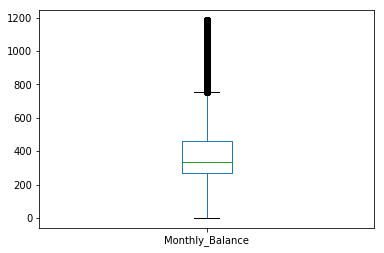

In [65]:
df['Monthly_Balance'].plot(kind="box")

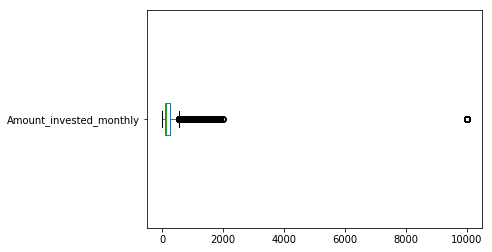

In [66]:
df['Amount_invested_monthly'].plot(kind="box" , vert=0)

## Credit Score Multi-Class Classification

In [67]:
df1 = pd.get_dummies(df, columns= ['Credit_Mix' , 'Payment_of_Min_Amount', 'Payment_Behaviour','Occupation'])

In [68]:
# Drop the Columns we not use in model
df1.drop(columns=['Month', 'Name', 'SSN'], inplace=True)

In [69]:
df1.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                         
1006         Credit-Builder Loan, and Payday Loan                                                                     12
1007         Home Equity Loan, Mortgage Loan, and Student Loan                                                        12
1008         No Lone                                                                                                  12
1009         Credit-Builder Loan, Student Loan, Not Specified, and Student Loan                                       12
1011         Personal Loan, Auto Loan, and Auto Loan                                                                  12
                                                                                                                      ..
50984        Home Equity Loan, Mortgage Loan, Payday Loan, Mortgage Loan, Mortgage Loan, and Payday Loan              12
50990        Mortgage Loan, Auto Loan,

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin

class GetDummies(BaseEstimator, TransformerMixin): 
    def __init__(self, data_sep=',', col_name_sep='_'):
        self.data_sep     = data_sep
        self.col_name_sep = col_name_sep
        self.columns      = None
        
    def fit(self, X, y=None): 
        object_cols       = X.select_dtypes(include="object").columns
        self.dummy_cols   = [col for col in object_cols if X[col].str.contains(self.data_sep, regex=True).any()]
        self.dummy_prefix = [''.join(map(lambda x: x[0], col.split(self.col_name_sep)))  if self.col_name_sep in col else col[:2]   for col in self.dummy_cols]
        
        self.columns = X.columns
        
        return self
    
    def transform(self, X, y=None):
        X_transformed = X.copy()
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            dummy_X = X_transformed[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep)
            X_transformed = pd.concat([X_transformed, dummy_X], axis=1)
        
        X_transformed.drop(columns=self.dummy_cols, inplace=True)
        
        return X_transformed
        
    def get_feature_names_out(self, input_features=None):
        return self.columns.tolist()


In [71]:
# Instantiate the GetDummies transformer
get_dummies_transformer = GetDummies(data_sep=', ', col_name_sep='_')

# Fit and transform the DataFrame
df1= get_dummies_transformer.fit_transform(df1)

# Display the transformed DataFrame
df1.head()

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,ToL_Student Loan,ToL_and Auto Loan,ToL_and Credit-Builder Loan,ToL_and Debt Consolidation Loan,ToL_and Home Equity Loan,ToL_and Mortgage Loan,ToL_and Not Specified,ToL_and Payday Loan,ToL_and Personal Loan,ToL_and Student Loan
0,3392,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,0,0,1,0,0,0,0,0
1,3392,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,3392,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,0,0,1,0,0,0,0,0
3,3392,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,0,0,0,0,1,0,0,0,0,0
4,3392,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 65 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Customer_ID                                         150000 non-null  int64  
 1   Age                                                 150000 non-null  float64
 2   Annual_Income                                       150000 non-null  float64
 3   Monthly_Inhand_Salary                               150000 non-null  float64
 4   Num_Bank_Accounts                                   150000 non-null  float64
 5   Num_Credit_Card                                     150000 non-null  float64
 6   Interest_Rate                                       150000 non-null  float64
 7   Num_of_Loan                                         150000 non-null  float64
 8   Delay_from_due_date                                 150000 non-n

In [73]:
df1.columns

Index(['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Occupation_Accountant', 'Occupation_Architec

In [74]:
# List of uint8 columns to convert to numeric
uint8_columns = [ 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer',]

# Convert boolean columns to numeric
df1[uint8_columns] = df1[uint8_columns].astype(int)

# Display the updated DataFrame information
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 65 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Customer_ID                                         150000 non-null  int64  
 1   Age                                                 150000 non-null  float64
 2   Annual_Income                                       150000 non-null  float64
 3   Monthly_Inhand_Salary                               150000 non-null  float64
 4   Num_Bank_Accounts                                   150000 non-null  float64
 5   Num_Credit_Card                                     150000 non-null  float64
 6   Interest_Rate                                       150000 non-null  float64
 7   Num_of_Loan                                         150000 non-null  float64
 8   Delay_from_due_date                                 150000 non-n

In [75]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,150000.0,25982.666640,14340.519150,1006.000000,13664.500000,25777.000000,38385.000000,50999.000000
Age,150000.0,33.492007,10.766935,14.000000,25.000000,33.000000,42.000000,56.000000
Annual_Income,150000.0,50505.123449,38299.358260,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,150000.0,4190.338345,3180.874778,303.645417,1625.165833,3089.424167,5948.454596,15204.633333
Num_Bank_Accounts,150000.0,5.369027,2.593946,0.000000,3.000000,5.000000,7.000000,11.000000
...,...,...,...,...,...,...,...,...
ToL_and Mortgage Loan,150000.0,0.084320,0.277868,0.000000,0.000000,0.000000,0.000000,1.000000
ToL_and Not Specified,150000.0,0.086080,0.280483,0.000000,0.000000,0.000000,0.000000,1.000000
ToL_and Payday Loan,150000.0,0.089040,0.284802,0.000000,0.000000,0.000000,0.000000,1.000000
ToL_and Personal Loan,150000.0,0.086640,0.281308,0.000000,0.000000,0.000000,0.000000,1.000000


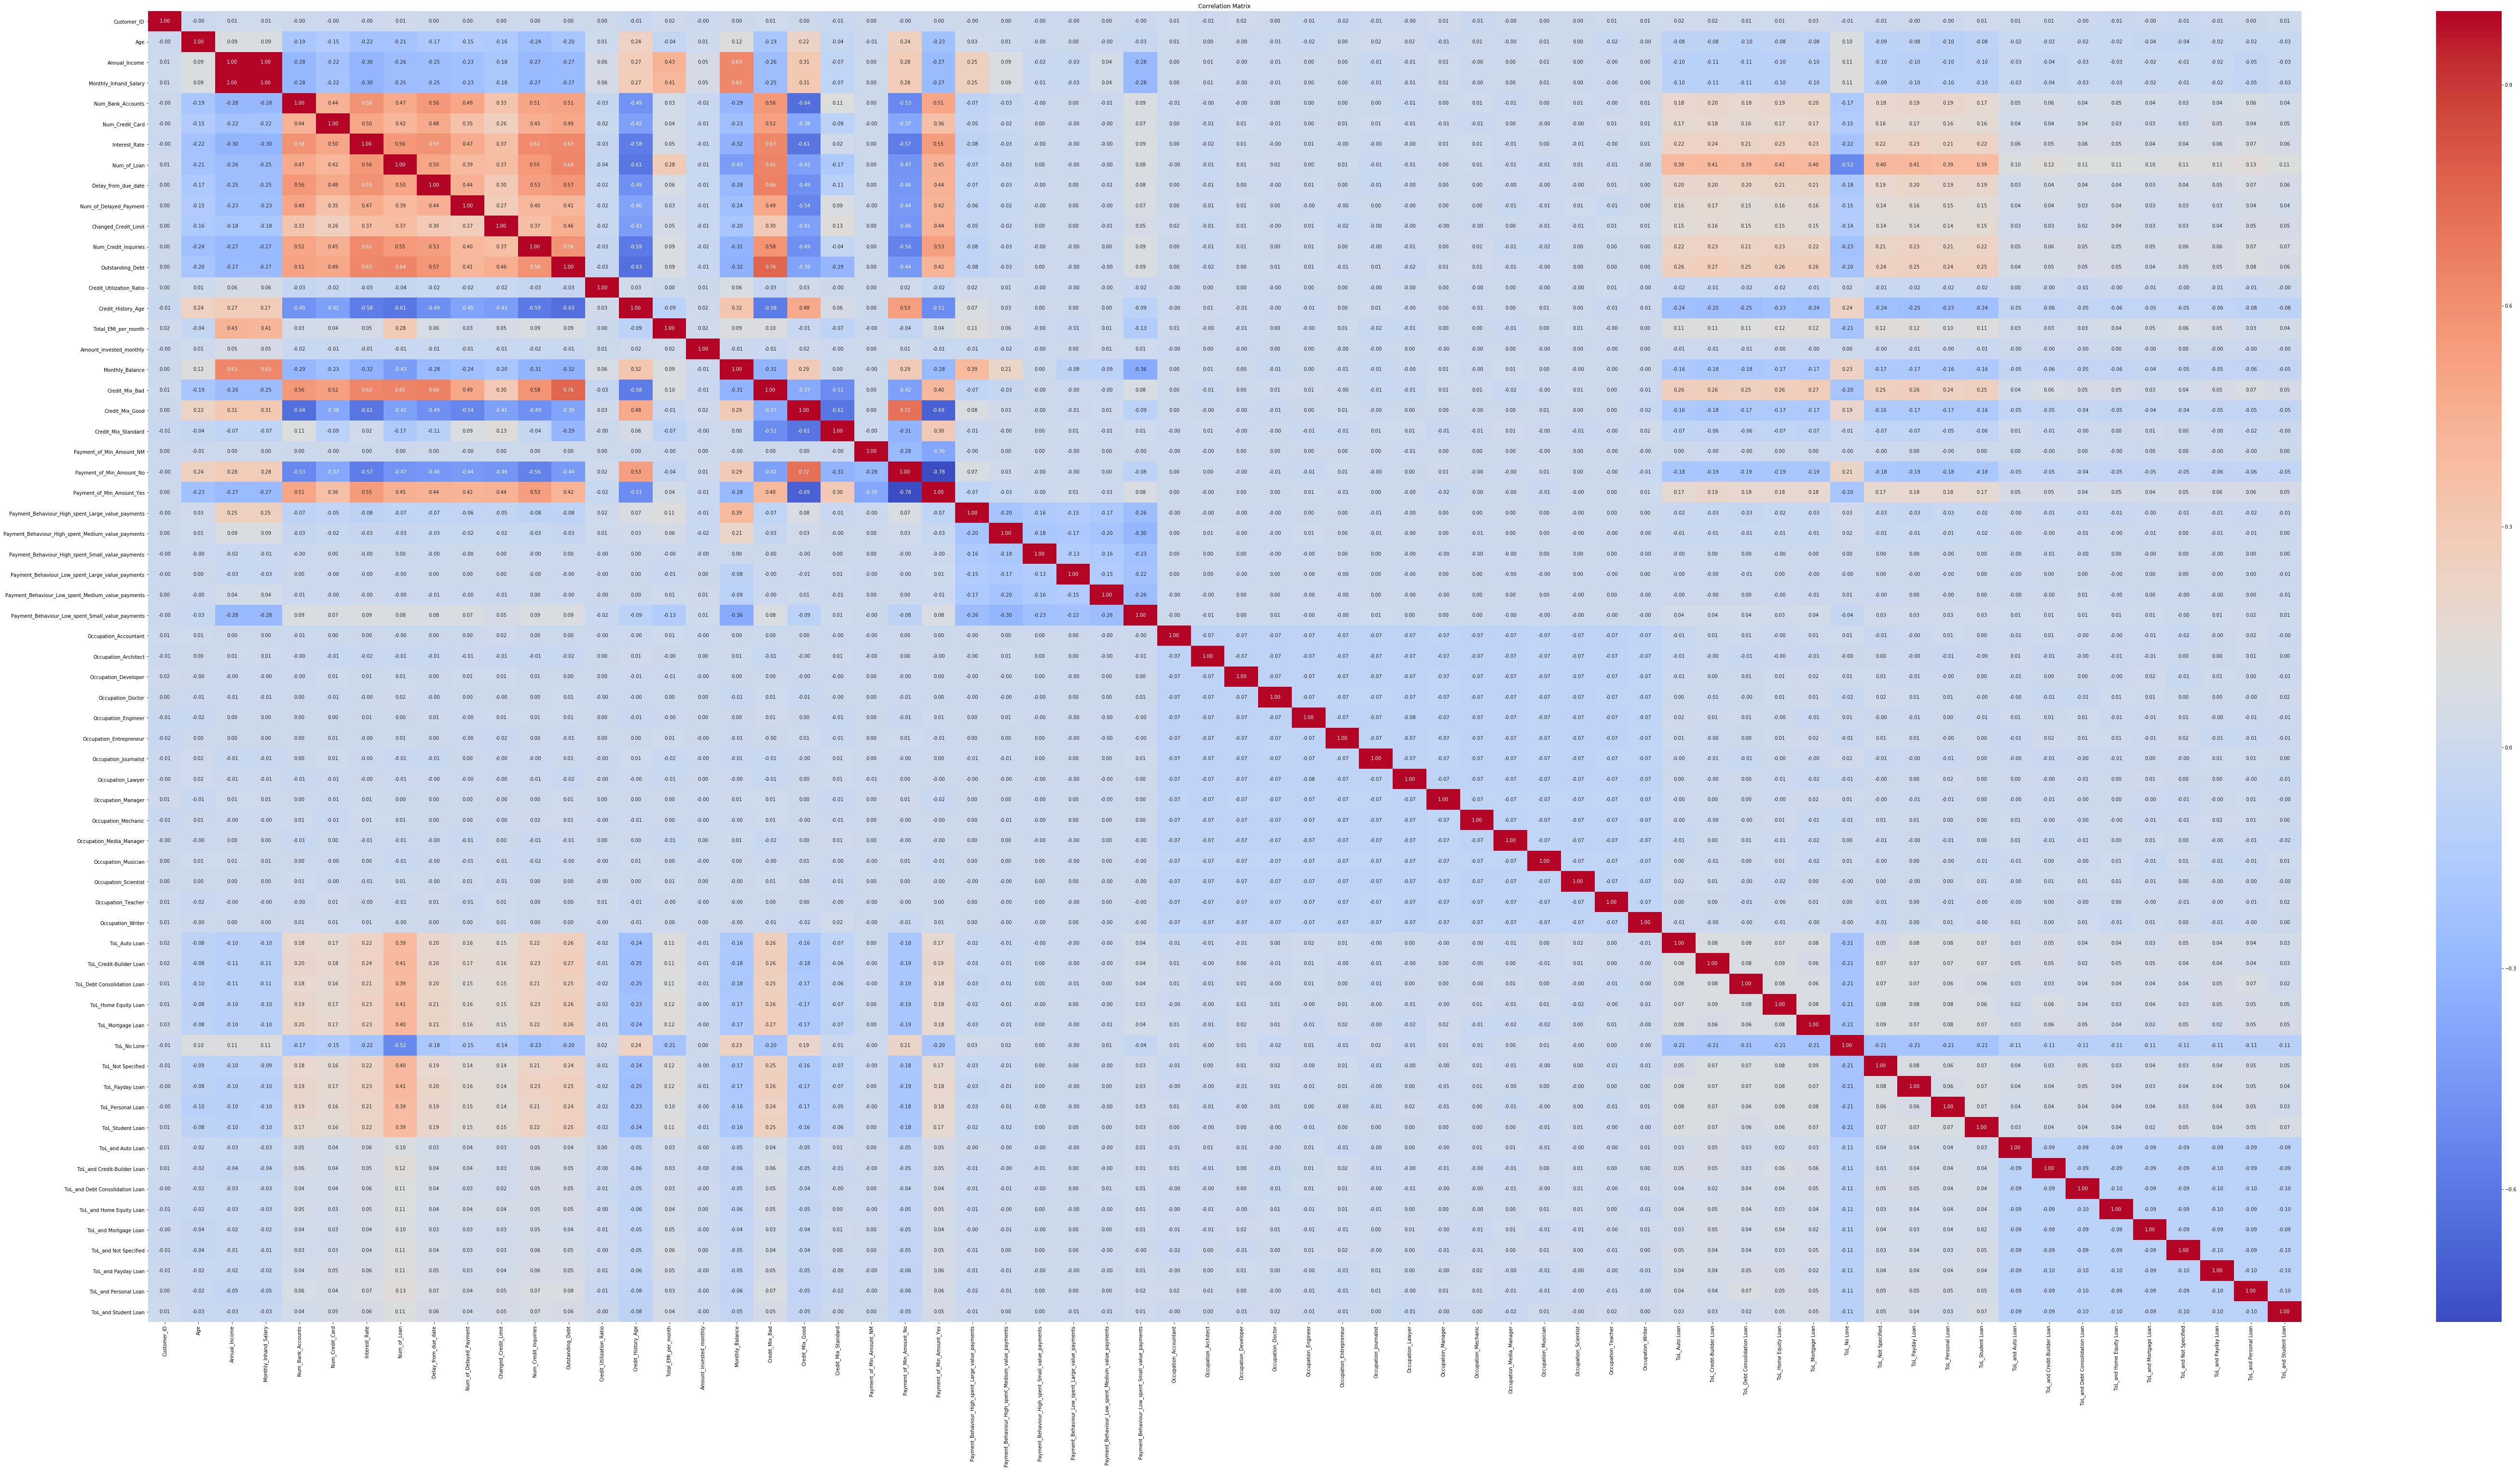

In [76]:
# Exclude non-numeric columns when calculating the correlation matrix
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df1[numeric_columns].corr()

# Display the correlation matrix
plt.figure(figsize=(100, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

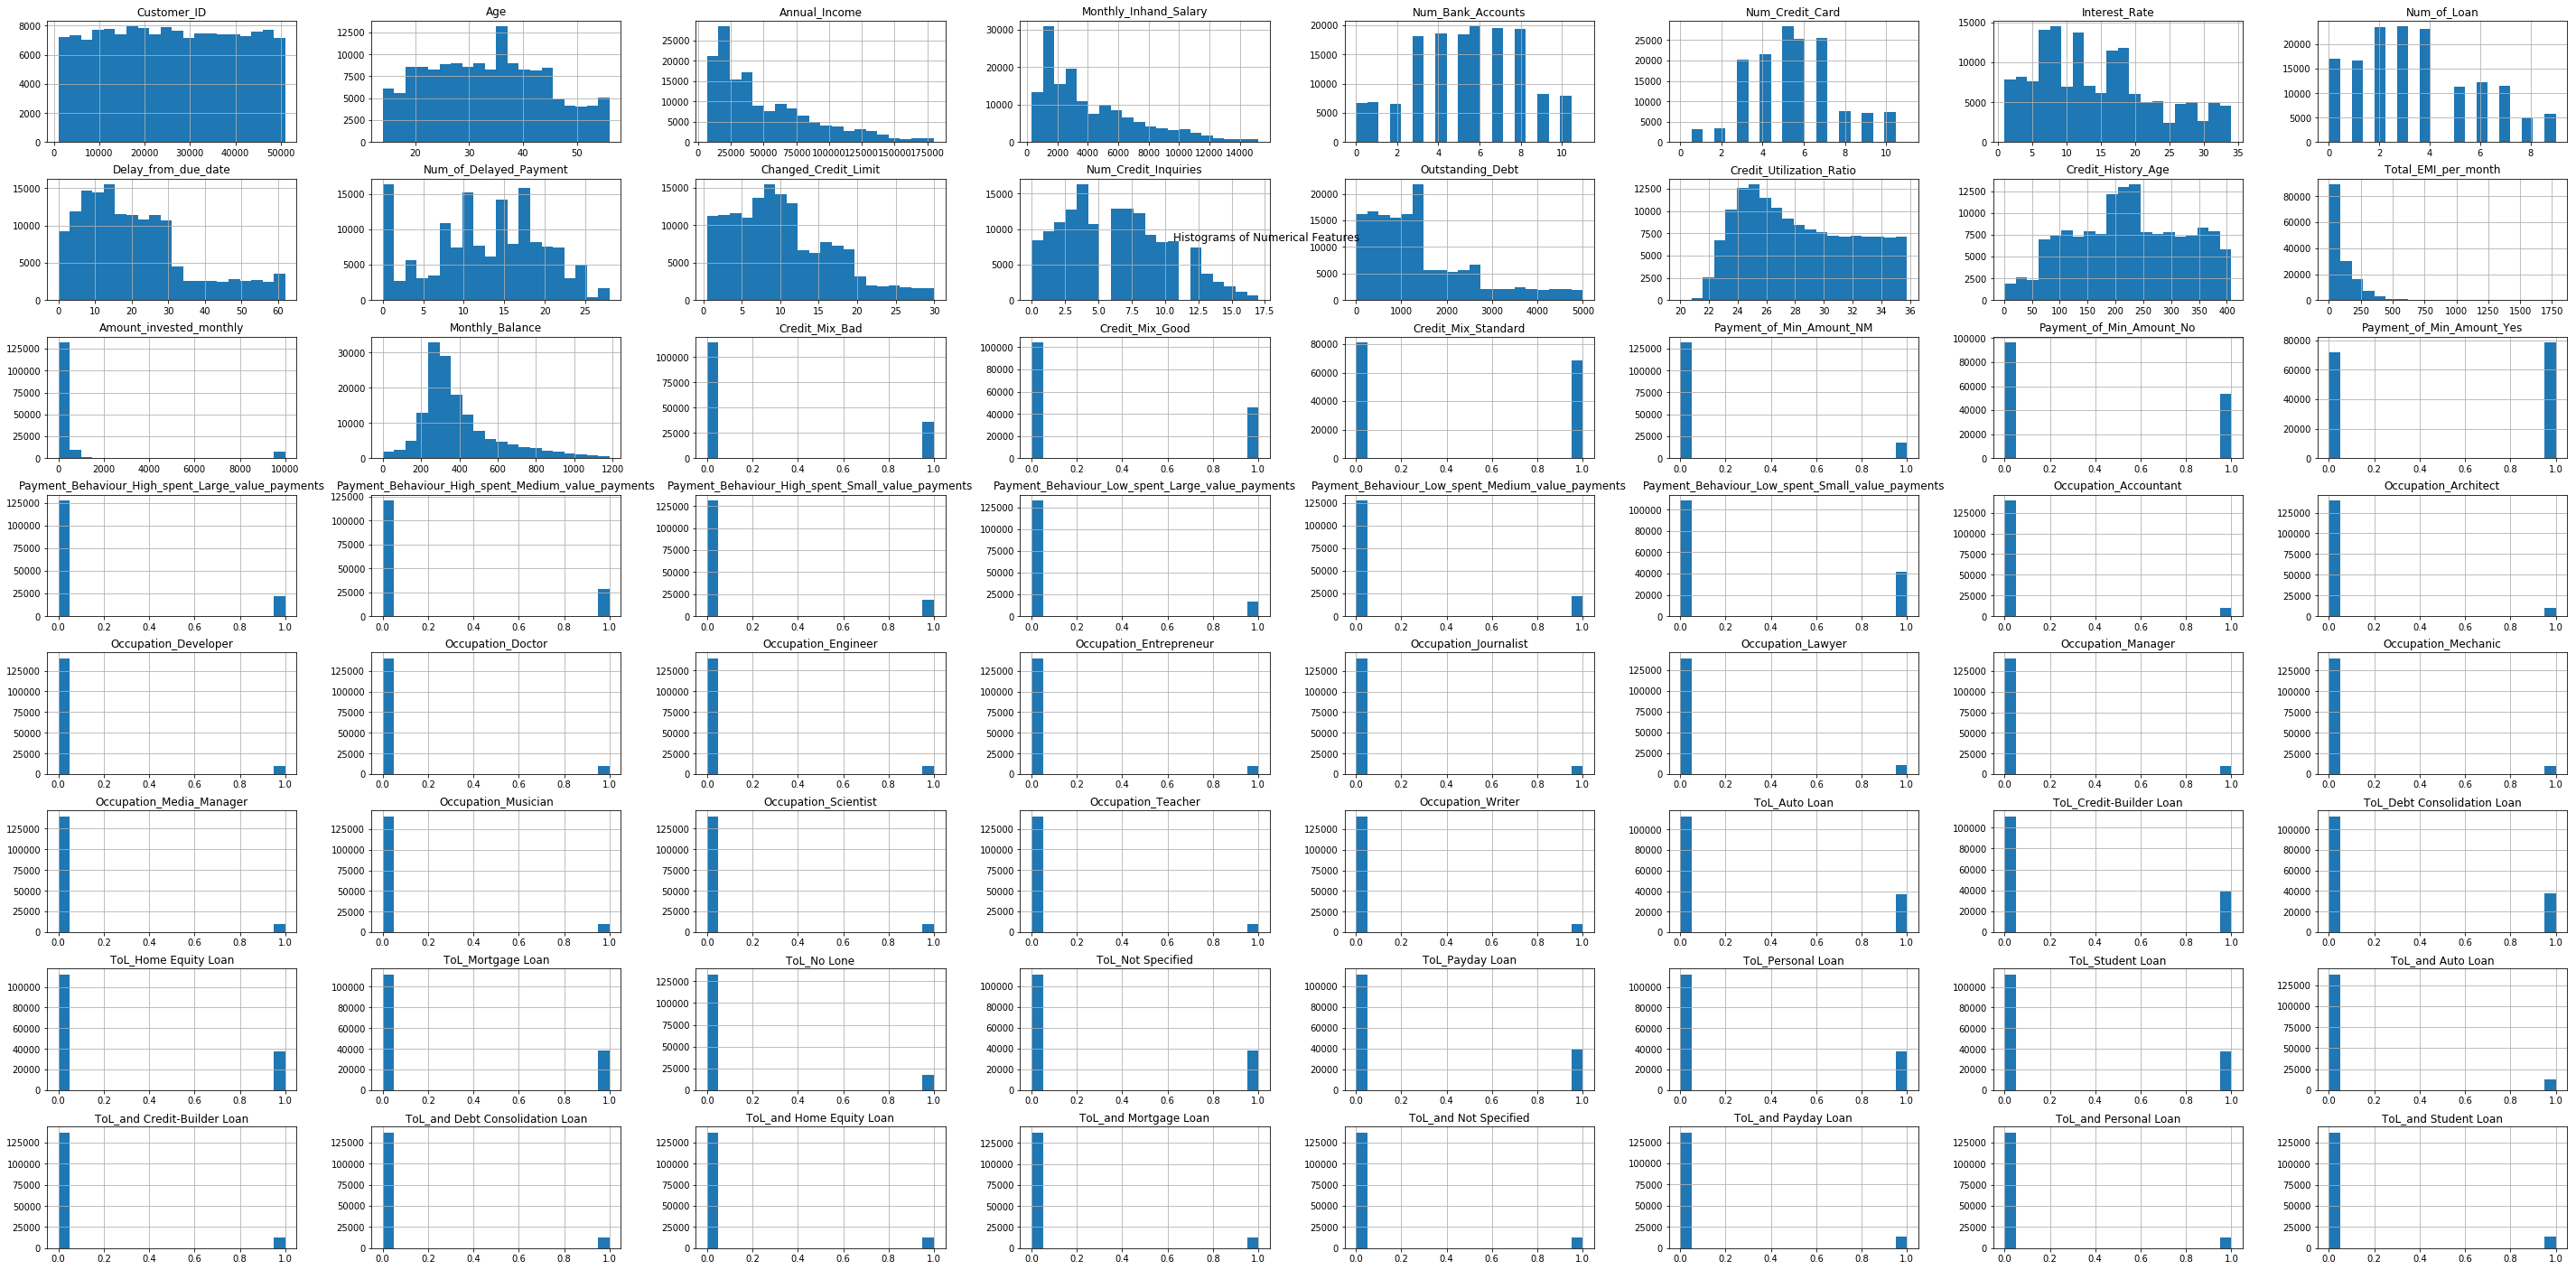

In [77]:
### Display histograms for numerical features
df1.hist(figsize=(50, 25), bins=20)
plt.suptitle('Histograms of Numerical Features', y=0.75)
plt.show()

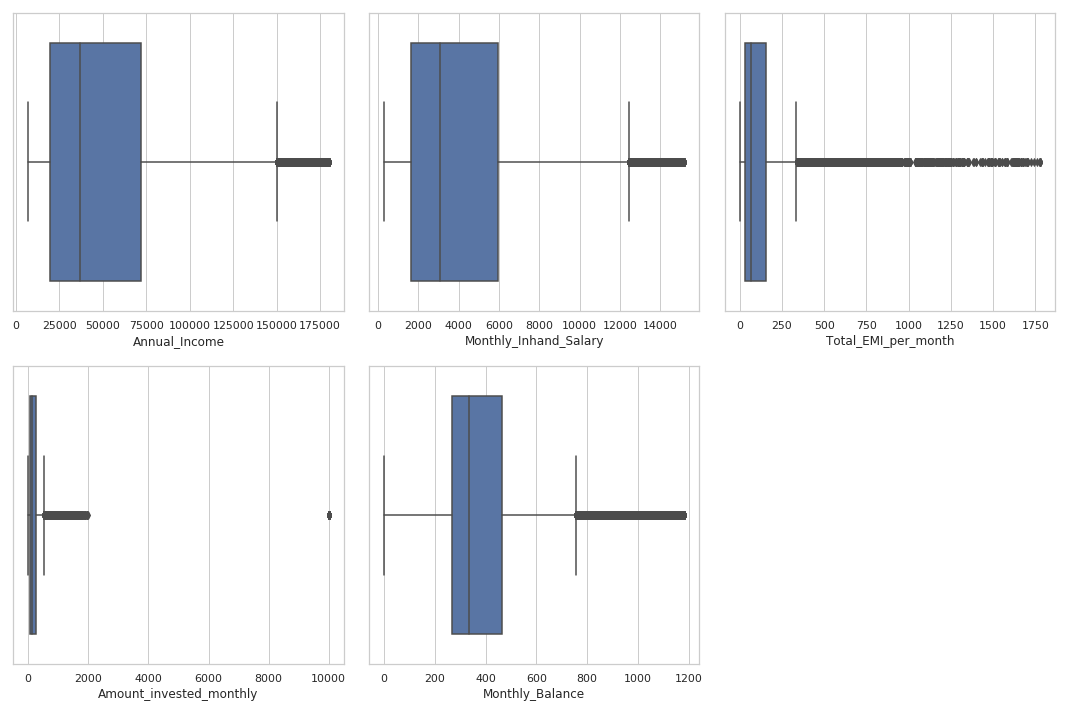

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns  # For better aesthetics in the plot

# Set the style for better aesthetics (optional)
sns.set(style="whitegrid")

# Create a box plot for each specified column
plt.figure(figsize=(15, 10))

columns_to_plot = ['Annual_Income', 'Monthly_Inhand_Salary', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df1[col])

plt.tight_layout()
plt.show()


In [79]:
import numpy as np

# Assuming df1 is your DataFrame with outliers
# Replace this with the actual name of your DataFrame

columns_to_treat = ['Annual_Income', 'Monthly_Inhand_Salary', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

for col in columns_to_treat:
    # Adding a small constant to avoid issues with zero or negative values
    df1[col] = np.log1p(df1[col])

# Display the DataFrame with replaced log-transformed columns
df1.head()


,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,ToL_Student Loan,ToL_and Auto Loan,ToL_and Credit-Builder Loan,ToL_and Debt Consolidation Loan,ToL_and Home Equity Loan,ToL_and Mortgage Loan,ToL_and Not Specified,ToL_and Payday Loan,ToL_and Personal Loan,ToL_and Student Loan
0,3392,23.0,9.858235,7.509797,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,0,0,1,0,0,0,0,0
1,3392,23.0,9.858235,7.509797,3.0,4.0,3.0,4.0,3.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,3392,24.0,9.858235,7.509797,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,0,0,1,0,0,0,0,0
3,3392,23.0,9.858235,7.509797,3.0,4.0,3.0,4.0,5.0,4.0,...,0,0,0,0,1,0,0,0,0,0
4,3392,23.0,9.858235,7.509797,3.0,4.0,3.0,4.0,6.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [80]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,150000.0,25982.666640,14340.519150,1006.000000,13664.500000,25777.000000,38385.000000,50999.000000
Age,150000.0,33.492007,10.766935,14.000000,25.000000,33.000000,42.000000,56.000000
Annual_Income,150000.0,10.536540,0.790547,8.854655,9.870136,10.518692,11.180029,12.100647
Monthly_Inhand_Salary,150000.0,8.043899,0.800118,5.719149,7.393980,8.036064,8.691055,9.629421
Num_Bank_Accounts,150000.0,5.369027,2.593946,0.000000,3.000000,5.000000,7.000000,11.000000
...,...,...,...,...,...,...,...,...
ToL_and Mortgage Loan,150000.0,0.084320,0.277868,0.000000,0.000000,0.000000,0.000000,1.000000
ToL_and Not Specified,150000.0,0.086080,0.280483,0.000000,0.000000,0.000000,0.000000,1.000000
ToL_and Payday Loan,150000.0,0.089040,0.284802,0.000000,0.000000,0.000000,0.000000,1.000000
ToL_and Personal Loan,150000.0,0.086640,0.281308,0.000000,0.000000,0.000000,0.000000,1.000000


In [81]:
# Separate df_combined back into train_data and test_data based on the 'Survived' column
train_data = df1[df1['Credit_Score'].notnull()]
test_data = df1[df1['Credit_Score'].isnull()].drop(columns=['Credit_Score'])

# Display the shapes of the resulting DataFrames
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (100000, 65)
Test Data Shape: (50000, 64)


In [82]:
# for data visulisation and graph ploting 
import matplotlib.pyplot as plt

# for spliting data in train and test 
from sklearn.model_selection import train_test_split

# for ploting the data in decision tree import decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# for data preprocessing 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [83]:
label_encoder = preprocessing.LabelEncoder()
train_data.loc[:, 'Credit_Score'] = label_encoder.fit_transform(train_data.loc[:, 'Credit_Score'])
train_data.loc[:, 'Credit_Score'].value_counts()

/home/debasish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


2    53174
1    28998
0    17828
Name: Credit_Score, dtype: int64

In [84]:
# Features (X) and target variable (y)
X = train_data.drop(columns=['Credit_Score'])  # Features
y = train_data['Credit_Score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (80000, 64)
X_test Shape: (20000, 64)
y_train Shape: (80000,)
y_test Shape: (20000,)


### Building Decision Tree Classifier using "gini" as a Criterion

In [85]:
model = DecisionTreeClassifier(criterion='gini', max_depth=60, random_state=50)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=60, random_state=50)

In [86]:
predc1= model.predict(X_test)

In [87]:
pd.Series(predc1).value_counts()

2    10666
1     5859
0     3475
dtype: int64

In [88]:
pd.crosstab(y_test,predc1)

col_0,0,1,2
Credit_Score,,,
0,2395,91,1041
1,67,4247,1560
2,1013,1521,8065


In [89]:
aquracy = np.mean(predc1==y_test)
print ('SCredi score prediction aquracy is  :')
print (aquracy)

SCredi score prediction aquracy is  :
0.73535


### Enssable Learning (Random Forest Classifier)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [91]:
sel = SelectFromModel(RandomForestClassifier(n_estimators =200,max_features = 64))
sel.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(max_features=64,
                                                 n_estimators=200))

In [92]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [93]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

18

In [94]:
print(selected_feat)

Index(['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Mix_Standard'],
      dtype='object')


In [95]:
# Creating a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators =200,max_features = 64, random_state=42)

# Fiting the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=64, n_estimators=200, random_state=42)

In [96]:
# Making predictions on the test data
y_pred_rf = rf_model.predict(X_test)
pd.Series(y_pred_rf).value_counts()

2    10302
1     6205
0     3493
dtype: int64

In [98]:
 ## Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.81165


In [99]:
pd.crosstab(y_test,y_pred_rf)

col_0,0,1,2
Credit_Score,,,
0,2711,18,798
1,28,4932,914
2,754,1255,8590


#### Testing random forest trained model with the new test data set : for Credit_Score prediction

In [123]:
y_pred_rf1 = rf_model.predict(test_data)
pd.Series(y_pred_rf1).value_counts()

2    25224
1    15275
0     9501
dtype: int64

In [125]:
df_test_data = test_data.copy()
df_test_data.loc[:,'Credit_Score.'] = y_pred_rf1
df_test_data.head()

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,ToL_and Auto Loan,ToL_and Credit-Builder Loan,ToL_and Debt Consolidation Loan,ToL_and Home Equity Loan,ToL_and Mortgage Loan,ToL_and Not Specified,ToL_and Payday Loan,ToL_and Personal Loan,ToL_and Student Loan,Credit_Score.
100000,3392,23.0,9.858235,7.509797,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,0,1,0,0,0,0,0,0
100001,3392,24.0,9.858235,7.509797,3.0,4.0,3.0,4.0,3.0,9.0,...,0,0,0,1,0,0,0,0,0,0
100002,3392,24.0,9.858235,7.509797,3.0,4.0,3.0,4.0,3.0,4.0,...,0,0,0,1,0,0,0,0,0,0
100003,3392,24.0,9.858235,7.509797,3.0,4.0,3.0,4.0,4.0,5.0,...,0,0,0,1,0,0,0,0,0,0
100004,8625,28.0,10.458775,8.019279,2.0,4.0,6.0,1.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
# Mapping dictionary
score_mapping = {0: 'good', 1: 'poor', 2: 'standard'}
df_test_data.loc[:, 'Credit_Score.'] = df_test_data.loc[:, 'Credit_Score.'].map(score_mapping)
df_test_data.sample(20)

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,ToL_and Auto Loan,ToL_and Credit-Builder Loan,ToL_and Debt Consolidation Loan,ToL_and Home Equity Loan,ToL_and Mortgage Loan,ToL_and Not Specified,ToL_and Payday Loan,ToL_and Personal Loan,ToL_and Student Loan,Credit_Score.
131720,5331,33.0,11.585932,9.119802,4.0,4.0,15.0,2.0,13.0,9.0,...,1,0,0,0,0,0,0,0,0,standard
100665,3989,18.0,9.655383,7.237332,9.0,5.0,25.0,3.0,27.0,23.0,...,0,0,0,0,0,1,0,0,0,poor
142920,45644,31.0,9.920319,7.465583,7.0,6.0,16.0,6.0,33.0,28.0,...,0,0,0,0,0,0,0,0,1,poor
148635,29752,38.0,11.687682,9.190602,3.0,6.0,15.0,3.0,25.0,0.0,...,0,0,0,0,0,1,0,0,0,good
130961,1036,46.0,9.946814,7.526385,6.0,6.0,15.0,1.0,11.0,12.0,...,0,0,0,0,0,0,0,0,0,standard
138081,10673,38.0,9.458961,6.838901,4.0,7.0,16.0,4.0,28.0,22.0,...,1,0,0,0,0,0,0,0,0,poor
113321,46510,49.0,11.037648,8.514962,5.0,7.0,13.0,4.0,19.0,8.0,...,1,0,0,0,0,0,0,0,0,standard
140572,38178,29.0,11.424774,8.950157,4.0,5.0,7.0,0.0,28.0,19.0,...,0,0,0,0,0,0,0,0,0,standard
142213,46259,29.0,11.133137,8.682872,6.0,5.0,23.0,5.0,60.0,18.0,...,0,0,0,0,0,0,1,0,0,standard
108160,23635,42.0,9.135288,6.318961,8.0,8.0,24.0,4.0,40.0,22.0,...,0,0,0,1,0,0,0,0,0,poor


In [129]:
df_test_data['Credit_Score.'].value_counts(dropna=False)

standard    25224
poor        15275
good         9501
Name: Credit_Score., dtype: int64

In [130]:
df_test_data.shape

(50000, 65)

In [134]:
# Features (X) and target variable (y)
x1 = df_test_data.drop(columns=['Credit_Score.'])  # Features
y1 = df_test_data['Credit_Score.']  # Target variable

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train Shape:", x1_train.shape)
print("X_test Shape:", x1_test.shape)
print("y_train Shape:", y1_train.shape)
print("y_test Shape:", y1_test.shape)

X_train Shape: (40000, 64)
X_test Shape: (10000, 64)
y_train Shape: (40000,)
y_test Shape: (10000,)


In [135]:
# Fiting the model to the training data
rf_model.fit(x1_train, y1_train)

RandomForestClassifier(max_features=64, n_estimators=200, random_state=42)

In [136]:
# Making predictions on the test data
y1_pred_rf = rf_model.predict(x1_test)
pd.Series(y1_pred_rf).value_counts()

standard    5016
poor        3039
good        1945
dtype: int64

In [137]:
 ## Calculating accuracy
accuracy = accuracy_score(y1_test, y1_pred_rf)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.9184


In [138]:
pd.crosstab(y1_test,y1_pred_rf)

col_0,good,poor,standard
Credit_Score.,,,
good,1746,12,176
poor,24,2792,194
standard,175,235,4646
